## My method for computing *square roots* by heart

In high school I used to challenge myself to estimate square roots of numbers up to 10,000 (and sometimes up to 1,000,000) in my head. Friends would call out a number, and I'd try to beat the calculator, aiming to be within 0.1, or preferably 0.01.

This notebook reconstructs how I did it: start from a quick linear estimate between consecutive perfect squares, then nudge that estimate using an intuitive correction.

### The mathematical basis since ancient times

Use **linear interpolation** (i.e., the first-order Taylor approximation) between $m^2$ and $(m+1)^2$, where $m=\lfloor \sqrt{N} \rfloor$:

$$
\sqrt{N} \approx m \;+\; \frac{N - m^2}{(m+1)^2 - m^2}
\;=\; m \;+\; \frac{N - m^2}{2m+1}.
$$

### Mental workflow

1. **Anchor:** Recall perfect squares $1^2,2^2,\dots,100^2$ and pick $m$ so that $m^2 \le N < (m+1)^2$.
2. **Linear step:** Compute $d = N - m^2$ and estimate

   $$
   r_0 = m + \frac{d}{2m+1}.
   $$


### Identities I relied on

* **Successive odd numbers (first differences of squares):**

  $$
  (m+1)^2 - m^2 = 2m+1.
  $$
* **Difference of squares (for quick checks/adjustments):**

  $$
  y = x + 1
  $$
  $$
  y^2 - x^2  = (y+x)(y-x) = x+y = 2x +1
  $$

For example, for the number 2376;
1. I'd know that 2025 = 45^2, 2500 = 50^2, and deduce 2304 = 48^2, and 2401 = 49^2.
2. d = 2376-2304 = 72. diff_squares = 48+49 = 97. linear estimate = 72/97 ≈ 75/100
3. That is ~0.75, % correction ~ -0.01, almost no linear correction at 0.75 of the curve at 48.
4. Final answer would be 48.74, which is pretty close

1. If I needed the value instantly, I could divide the number by 100: 23.76, approximate from 16-25, d=9, 7.8/9 ≈ 86.5% = 48.65, % correct to 48.60, correct by 0.1 at x=4 at 86.5%, for ~48.7.



9.5005005005005
9.513648590814647
9.501501501501501
9.514648103242102
9.502502502502503
9.515647510681948


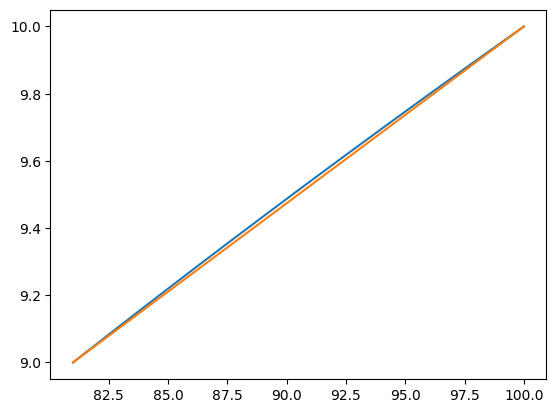

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = []
y = []

xAprox = []
yAprox = []

for i in np.linspace(81, 100, 1000):
  yNew = np.sqrt(i)
  x.append(i)
  y.append(yNew)

  if i < 1:
    yAproxNew = i/1
  else:
    yAproxNew = (i-81)/19 + np.sqrt(x[0])

  if i > 90.5 and i < 90.55:
    print(yAproxNew)
    print(yNew)
  xAprox.append(i)
  yAprox.append(yAproxNew)

plt.plot(x,y)
plt.plot(xAprox,yAprox)

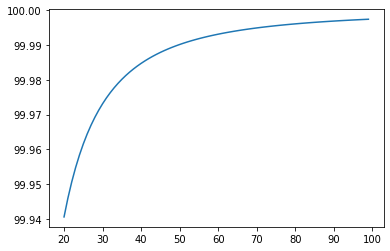

In [ ]:
#calculation of similarity of slope
#slope of np.sqrt(x) = 0.5/np.sqrt(x)
simulScore = []
x2 = []
steps = range(20, 100)

for c in np.linspace(steps[0], steps[-1], len(steps)):
  #ySlope = 1/(2*n +1)
  #xSlope = 0.5/np.sqrt(n)
  xMiddleGround = ((c+1)**2-c**2)*0.5+(c)**2
  sqrtMiddleGround = ((2*c + 1)**2)/4

  simulScoreNew = sqrtMiddleGround/xMiddleGround * 100
  simulScore.append(simulScoreNew)
  x2.append(c)
plt.plot(x2, simulScore)


In [ ]:
myList= []
for n in range(0,10000):
  aNew = n**2
  myList.append(aNew)



In [ ]:
from bisect import bisect_left
myNumber = 31
def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:
        return before

def approx_roots(myList, myNumber):
  list_pos = myList.index(take_closest(myList,myNumber))
  first_closest = myList[list_pos]
  my_list_plusmin = [myList[list_pos - 1], myList[list_pos +1]]
  sec_closest = take_closest(my_list_plusmin,myNumber)
  calc_abs = abs(first_closest-sec_closest)
  first_sec_list = [first_closest, sec_closest]

  approximation = (myNumber - min(first_sec_list))/calc_abs + myList.index(min(first_sec_list))
  return approximation

def real_roots(myNumber):
  return np.sqrt(myNumber)

differences_squares = []
check = []
for n in range(0,100000):
  difference_roots = abs(approx_roots(myList, n) - real_roots(n))
  differences_squares.append(difference_roots)
  check.append(difference_roots)
differences_squares.sort(reverse = True)
print(differences_squares)
for i2 in range(0,1000):
    print(check.index(differences_squares[i2]))


[0.5857864376269049, 0.09726535583354323, 0.06538414090221067, 0.04948974278317797, 0.04575131106459063, 0.037722339831620655, 0.035530186566326005, 0.03412270403541795, 0.030910504641114223, 0.02842712474619047, 0.02769151055513497, 0.027371672488226917, 0.02702013940028447, 0.02556561020734094, 0.02374909315676277, 0.022680120506207047, 0.02230981737547655, 0.021528443498140426, 0.020490613128743895, 0.02041846489706245, 0.019751517239481764, 0.019202236869398703, 0.018976985840462035, 0.018775349401908947, 0.018508852817463506, 0.018053745534941434, 0.017864965326184645, 0.0172899192653011, 0.016863012644451558, 0.016648106881215874, 0.016501101937416607, 0.016198487095662628, 0.015896240191676902, 0.015840489064559815, 0.01577310586390901, 0.015135895016201495, 0.014693138944451789, 0.014591980611648125, 0.014479081201940858, 0.014385067294005793, 0.014334240888450367, 0.014228767629167471, 0.014089972924979932, 0.013659088870166869, 0.013443222613851447, 0.013195214314976056, 0.01